# Input Parameters

In [1]:
#Importing libraries and setting variables to be used in calculations
import numpy as np
import matplotlib as plt
import math as math
import sympy as sp
%matplotlib qt

#Define variables
wheelbase = 1.586 #Car-10 is 1.586m
track = 1.256 #Car-10 is 1.256m

#Inner and outer wheel steering angle in degrees
iwsa = 43
owsa = 30

#Conversion from degrees to radians
sigma_i = np.deg2rad(iwsa)
sigma_o = np.deg2rad(owsa)

#x,y co-ordinates of each wheel
fr = np.array([track/2,wheelbase])
fl = np.array([-track/2,wheelbase])
rr = np.array([track/2,0])
rl = np.array([-track/2,0])

#x,y co-ordinates of front and rear axle centres
fc = np.array([0,wheelbase])
rc = np.array([0,0])

#Position for centre of gravity
#Assume 50:50 weight distribution until further information is available
a = (189/380)*wheelbase
cg = np.array([0,a])
print(a)

OL = np.array([(-wheelbase/(np.tan(sigma_i)))-(track/2),0])
OR = np.array([-1*(wheelbase/(np.tan(sigma_o)))+(track/2),0])

rollrad = 0.27 #Rolling radius in m

0.7888263157894737


# Turning Radius Based on Ackermann Geometry Assuming Full Ackerman

In [2]:
#For this mode of analysis full Ackermann geometry is assumed and the outer
#steering angle and turning radius is calculated using

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
import math as math

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.text(fr[0],fr[1],'FR',fontsize=12)
plt.text(fl[0],fl[1],'FL',fontsize=12)
plt.text(rr[0],rr[1],'RR',fontsize=12)
plt.text(rl[0],rl[1],'RL',fontsize=12)

plt.text(fc[0],fc[1],'FC',fontsize=12)
plt.text(rc[0],rc[1],'RC',fontsize=12)

plt.text(cg[0],cg[1],'CG',fontsize=12)

plt.text(OL[0],OL[1],'O',fontsize=12)

sigma_A = np.arctan(fr[1]/(-1*OL[0]+fr[0]))
owsa_A = np.rad2deg(sigma_A)
print(round(owsa_A,2),' degrees should be the steering angle on the outer wheel for an Ackermann approximation')
      
frw = patches.Rectangle((fr[0]-0.05*np.cos(sigma_A)+0.15*np.cos(np.pi/2-sigma_A),fr[1]-0.05*np.sin(sigma_A)-0.15*np.sin(np.pi/2-sigma_A)), 0.1, 0.3, angle=owsa_A,edgecolor='red',facecolor='none')
flw = patches.Rectangle((fl[0]-0.05*np.cos(sigma_i)+0.15*np.cos(np.pi/2-sigma_i),fl[1]-0.05*np.sin(sigma_i)-0.15*np.sin(np.pi/2-sigma_i)), 0.1, 0.3, angle=iwsa,edgecolor='red',facecolor='none')
rrw = patches.Rectangle((rr[0]-0.05,rr[1]-0.15), 0.1, 0.3, angle=0.0,edgecolor='red',facecolor='none')
rlw = patches.Rectangle((rl[0]-0.05,rl[1]-0.15), 0.1, 0.3, angle=0.0,edgecolor='red',facecolor='none')


ax.add_patch(frw)
ax.add_patch(flw)
ax.add_patch(rrw)
ax.add_patch(rlw)

plt.plot([fl[0], fr[0]], [fr[1], fl[1]], 'g-') 
plt.plot([rl[0], rr[0]], [rr[1], rl[1]], 'g-')
plt.plot([rc[0], fc[0]], [rc[1], fc[1]], 'g-')
plt.plot([fl[0], OL[0]], [fl[1], OL[1]], 'b-')
plt.plot([fr[0], OL[0]], [fr[1], OL[1]], 'b-')
plt.plot([cg[0], OL[0]], [cg[1], OL[1]], 'b-')
plt.plot([rc[0], OL[0]], [rc[1], OL[1]], 'b-')  

AckAngle = np.arctan(1/(((1/(np.tan(sigma_A)))+(1/(np.tan(sigma_i))))/2))
TR = math.sqrt(cg[1]**2+wheelbase**2*(1/(np.tan(AckAngle)**2)))
print(round(np.rad2deg(AckAngle),2),' degrees is the Ackermann angle for the current steering angles')
print(round(TR,2), 'm, is the calculated theoretical turing radius')

plt.xlabel("X (Lateral distance in meters)")
plt.ylabel("Y (Longitudinal distance in meters)")
plt.title('Ackermann Geometry and Turning Radius of TuksBaja Vehicle With Approximated Ackermann Geometry')
plt.grid(True)
plt.show()


28.21  degrees should be the steering angle on the outer wheel for an Ackermann approximation
34.26  degrees is the Ackermann angle for the current steering angles
2.46 m, is the calculated theoretical turing radius


# Turning Radius Based on Ackermann Geometry Using Two inputs

In [3]:
#Turning radius calculated using the basic Ackermann geometry
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches 

%matplotlib qt

#Faster way to edit the outer wheel steering angle when needed
iwsa = 43
owsa = 30
sigma_i = np.deg2rad(iwsa)
sigma_o = np.deg2rad(owsa)

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.text(fr[0],fr[1],'FR',fontsize=12)
plt.text(fl[0],fl[1],'FL',fontsize=12)
plt.text(rr[0],rr[1],'RR',fontsize=12)
plt.text(rl[0],rl[1],'RL',fontsize=12)

plt.text(fc[0],fc[1],'FC',fontsize=12)
plt.text(rc[0],rc[1],'RC',fontsize=12)

plt.text(cg[0],cg[1],'CG',fontsize=12)

frw = patches.Rectangle((fr[0]-0.05*np.cos(sigma_o)+0.15*np.cos(np.pi/2-sigma_o),fr[1]-0.05*np.sin(sigma_o)-0.15*np.sin(np.pi/2-sigma_o)), 0.1, 0.3, angle=owsa,edgecolor='red',facecolor='none')
flw = patches.Rectangle((fl[0]-0.05*np.cos(sigma_i)+0.15*np.cos(np.pi/2-sigma_i),fl[1]-0.05*np.sin(sigma_i)-0.15*np.sin(np.pi/2-sigma_i)), 0.1, 0.3, angle=iwsa,edgecolor='red',facecolor='none')
rrw = patches.Rectangle((rr[0]-0.05,rr[1]-0.15), 0.1, 0.3, angle=0.0,edgecolor='red',facecolor='none')
rlw = patches.Rectangle((rl[0]-0.05,rl[1]-0.15), 0.1, 0.3, angle=0.0,edgecolor='red',facecolor='none')

ax.add_patch(frw)
ax.add_patch(flw)
ax.add_patch(rrw)
ax.add_patch(rlw)

AckAngle = np.arctan(1/(((1/(np.tan(sigma_o)))+(1/(np.tan(sigma_i))))/2))
TR = math.sqrt(cg[1]**2+wheelbase**2*(1/(np.tan(AckAngle)**2)))
print(round(np.rad2deg(AckAngle),2),' degrees is the Ackermann angle for the current steering angles')
print(round(TR,2), 'm, is the calculated theoretical turing radius')

OL = np.array([(-wheelbase/(np.tan(sigma_i)))-(track/2),0])
OR = np.array([-1*(wheelbase/(np.tan(sigma_o)))+(track/2),0])
OC = np.array([-1*(fc[1]/(np.tan(AckAngle))),0])

plt.text(OL[0],OL[1],'OL',fontsize=12)
plt.text(OR[0],OR[1],'OR',fontsize=12)

plt.plot([fl[0], fr[0]], [fr[1], fl[1]], 'g-') 
plt.plot([rl[0], rr[0]], [rr[1], rl[1]], 'g-')
plt.plot([rc[0], fc[0]], [rc[1], fc[1]], 'g-')
plt.plot([fl[0], OL[0]], [fl[1], OL[1]], 'b-')
plt.plot([fr[0], OR[0]], [fr[1], OR[1]], 'b-')
plt.plot([cg[0], OC[0]], [cg[1], OC[1]], 'b-')
plt.plot([rc[0], OR[0]], [rc[1], OR[1]], 'b-')  
plt.plot([rc[0], OL[0]], [rc[1], OL[1]], 'b-') 

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ackermann Geometry and Turning Radius of Car-10 Polaris CV Implementation With Percentage Ackermann')
plt.grid(True)
plt.show()


35.49  degrees is the Ackermann angle for the current steering angles
2.36 m, is the calculated theoretical turing radius


# Percentage Ackermann for Current Config

In [4]:
#The percentage Ackermann caculated for the current steering configuration
PercentAckermann = ((iwsa-owsa)/iwsa)*100
print(round(PercentAckermann,2),' percent Ackermann is present in the system')

30.23  percent Ackermann is present in the system


# Bicycle Model

In [5]:
#Updated model that is able to take into account slip angles
def bicycle(AckAngle):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

#Set slip angle alpha. In this analysis it will be the same in the front and in the rear
    alpha = 10 #Degrees
    x_intercept = (-1*fc[1])/(np.tan(AckAngle))
    y_intercept = -1*np.tan(np.deg2rad(alpha))*x_intercept
    ICR = np.array([x_intercept,y_intercept])

    plt.text(fc[0],fc[1],'FC',fontsize=12)
    plt.text(rc[0],rc[1],'RC',fontsize=12)
    plt.text(ICR[0],ICR[1],'ICR',fontsize=12)
    plt.text(cg[0],cg[1],'CG',fontsize=12)

    fbw = patches.Rectangle((fc[0]-0.05*np.cos(AckAngle)+0.15*np.cos(np.pi/2-AckAngle),fr[1]-0.05*np.sin(AckAngle)-0.15*np.sin(np.pi/2-AckAngle)), 0.1, 0.3, angle=np.rad2deg(AckAngle),edgecolor='red',facecolor='none')
    rbw = patches.Rectangle((rc[0]-0.05,rc[1]-0.15), 0.1, 0.3, angle=0.0,edgecolor='red',facecolor='none')
    fsa = patches.Arrow(fc[0], fc[1], -0.5*np.sin(AckAngle-np.deg2rad(alpha)), 0.5*np.cos(AckAngle-np.deg2rad(alpha)), width=0.05, edgecolor='black', facecolor='red')
    rsa = patches.Arrow(rc[0], rc[1], 0.5*np.sin(np.deg2rad(alpha)), 0.5*np.cos(AckAngle-np.deg2rad(alpha)), width=0.05, edgecolor='black', facecolor='red')
    ax.add_patch(fbw)
    ax.add_patch(rbw)
    ax.add_patch(fsa)
    ax.add_patch(rsa)

    plt.plot([fc[0], rc[0]], [fc[1], rc[1]], 'g-') 
    plt.plot([ICR[0], fc[0]], [ICR[1], fc[1]], 'b-')
    plt.plot([ICR[0], rc[0]], [ICR[1], rc[1]], 'b-')
    plt.plot([ICR[0], cg[0]], [ICR[1], cg[1]], 'b-')


    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Bicycle Model of Car-10 Polaris CV Joint All-Wheel Drive Implementation')
    plt.grid(True)
    plt.show()
    R = R = hypotenuse = math.sqrt((ICR[0])**2 + (cg[1]-ICR[1])**2)
    print(round(R,2),'m is the radius around which the vehicle is turning based on the bicycle model.')

bicycle(AckAngle)

2.26 m is the radius around which the vehicle is turning based on the bicycle model.


# Projection of real steering angle data

In [6]:
def theta_w(x):
    return (0.0043*(x**2) - 0.8466*x -1.6943)
acount = np.linspace(-42.23,42.23,1000)

plt.figure(figsize=(10, 6))
plt.grid('True')
plt.plot(acount,theta_w(acount))
plt.title('Steering angle against displacement for Polaris RZR800 CV joints')
plt.xlabel('Steering rack displacement in mm')
plt.ylabel('Steering angle achieved')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

# Bicycle model with real steering angles

In [7]:
import ipywidgets as widgets
from ipywidgets import interact

def AAngle(x):
        sigma_i = np.deg2rad(theta_w(-1*x))
        sigma_0 = np.deg2rad(theta_w(x))
        AckAngle = np.arctan(1/(((1/(np.tan(sigma_o)))+(1/(np.tan(sigma_i))))/2))
        return AckAngle
    
slider = widgets.FloatSlider(value=30, min=5, max=50, step=0.1, description='Steering rack displacement')

def update_bicycle(x):
    AckAngle = AAngle(x)
    bicycle(AckAngle)
    
interact(update_bicycle, x=slider)

interactive(children=(FloatSlider(value=30.0, description='Steering rack displacement', max=50.0, min=5.0), Ou…

<function __main__.update_bicycle(x)>

# Bicycle model with turning radius

In [8]:
def bicycle_C(AckAngle):
    plt.figure(figsize=(14, 10))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    alpha = 10 #Degrees
    x_intercept = (-1*fc[1])/(np.tan(AckAngle))
    y_intercept = -1*np.tan(np.deg2rad(alpha))*x_intercept
    ICR = np.array([x_intercept,y_intercept])

    plt.text(fc[0],fc[1],'FC',fontsize=12)
    plt.text(rc[0],rc[1],'RC',fontsize=12)
    plt.text(ICR[0],ICR[1],'ICR',fontsize=12)
    plt.text(cg[0],cg[1],'CG',fontsize=12)

    fbw = patches.Rectangle((fc[0]-0.05*np.cos(AckAngle)+0.15*np.cos(np.pi/2-AckAngle),fr[1]-0.05*np.sin(AckAngle)-0.15*np.sin(np.pi/2-AckAngle)), 0.1, 0.3, angle=np.rad2deg(AckAngle),edgecolor='red',facecolor='none')
    rbw = patches.Rectangle((rc[0]-0.05,rc[1]-0.15), 0.1, 0.3, angle=0.0,edgecolor='red',facecolor='none')
    fsa = patches.Arrow(fc[0], fc[1], -0.5*np.sin(AckAngle-np.deg2rad(alpha)), 0.5*np.cos(AckAngle-np.deg2rad(alpha)), width=0.05, edgecolor='black', facecolor='red')
    rsa = patches.Arrow(rc[0], rc[1], 0.5*np.sin(np.deg2rad(alpha)), 0.5*np.cos(AckAngle-np.deg2rad(alpha)), width=0.05, edgecolor='black', facecolor='red')
    ax.add_patch(fbw)
    ax.add_patch(rbw)
    ax.add_patch(fsa)
    ax.add_patch(rsa)

    plt.plot([fc[0], rc[0]], [fc[1], rc[1]], 'g-') 
    plt.plot([ICR[0], fc[0]], [ICR[1], fc[1]], 'b-')
    plt.plot([ICR[0], rc[0]], [ICR[1], rc[1]], 'b-')
    plt.plot([ICR[0], cg[0]], [ICR[1], cg[1]], 'b-')


    R = R = hypotenuse = math.sqrt((ICR[0])**2 + (cg[1]-ICR[1])**2)
    
    circle = plt.Circle(ICR, R, color='orange', fill=False)
    ax.add_artist(circle)

    # Adjust the plot limits
    ax.set_xlim(ICR[0] - R - 1, ICR[0] + R + 2)
    ax.set_ylim(ICR[1] - R - 1, ICR[1] + R + 1)

    # Final plot details
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Bicycle Model with Turning Radius Circle')
    plt.grid(True)

    plt.show()

    print(round(R,2),'m is the radius around which the vehicle is turning based on the bicycle model.')

    
bicycle_C((AAngle(42.2)))

2.3 m is the radius around which the vehicle is turning based on the bicycle model.


# Variables and Parameters for Understeer Coefficients

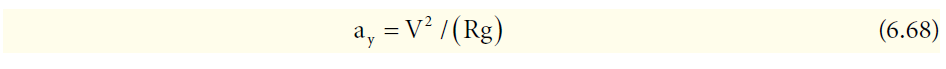

In [74]:
L = wheelbase
g = 9.81 #m/s^2
R = 5+(track/2) #m
mf = 191 #kg
mr = 189 #kg
hcg = 0.578 #m
hrcf = 0.219 #m
hrcr = 0.161 #m
Wf = mf*g
Wr = mr*g

Calphaf = -1*(2.475E-5)*(Wf/2)**2 + 0.1971*(Wf/2) - 10.3 
Calphar = -1*(2.518E-5)*(Wr/2)**2 + 0.198*(Wr/2) - 10.31

bf = -2.475E-5
br = -2.518E-5
def delta_F_get(V):
    Al = (V**2)/(g*R)
    deltaFzf = (mf*Al*(hcg-hrcf)+mf*Al*hrcf)/(track/2) #N
    deltaFzr = (mr*Al*(hcg-hrcr)+mr*Al*hrcr)/(track/2) #N
    return deltaFzf, deltaFzr

# Understeer Coefficient: Cornering Stiffness

In [75]:
import sympy as sp

delta, V = sp.symbols('delta V')
Kcs_eq = sp.Eq(57.3*(L/R)+((Wf*V**2)/(Calphaf*g*R))-((Wr*V**2)/(Calphar*g*R)),delta)
solution = sp.solve(Kcs_eq, delta)[0]

deltalist = []
vlist = np.arange(0, 10, 0.1)
for v in vlist:
    delta_value = solution.subs(V, v)
    deltalist.append(float(delta_value))

plt.figure(figsize=(14, 10))
plt.plot(vlist, deltalist, label="Ackermann Angle (Delta)")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Ackermann Angle (Delta in degrees)")
plt.title("Ackermann Angle vs Velocity")
plt.grid(True)
plt.legend()
plt.show()

#Basic understeer coefficient is:
Kcs = (Wf/Calphaf - Wr/Calphar)
print('Kcs is: ',Kcs,' [deg/g]')

Kcs is:  0.046319117041099034  [deg/g]


# Understeer Coefficient: Lateral Load Transfer

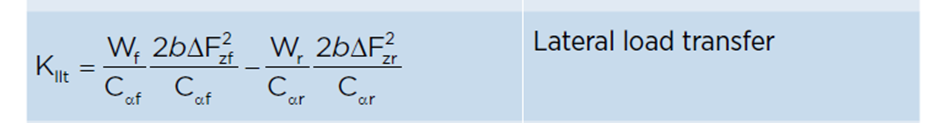

In [76]:
deltaFzf, deltaFzr = delta_F_get(6)
Kllt = ((Wf*2*bf*deltaFzf**2)/Calphaf) - ((Wr*2*br*deltaFzr**2)/Calphar)
print('Kllt is: ',Kllt,' [deg/g]')

Kllt is:  -0.060516939594475794  [deg/g]


In [77]:
vlist = np.arange(0, 10, 0.1)
Fzflist = []
Fzrlist = []
Klltlist = []
for v in vlist:
    deltaFzf, deltaFzr = delta_F_get(v)
    Fzflist.append(deltaFzf)
    Fzrlist.append(deltaFzr)
    Kllt = (Wf*2*bf*deltaFzf**2)/Calphaf - (Wr*2*br*deltaFzr**2)/Calphar
    Klltlist.append(Kllt)
    
plt.figure(figsize=(14, 10))
plt.plot(vlist, Fzflist , label="Change in Vertical Force on the Front Wheels",color='blue')
plt.plot(vlist, Fzrlist , label="Change in Vertical Force on the Rear Wheels",color='green')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Change in vertical force on the wheels [N}]")
plt.title("Change in vertical force on the wheels against velocity of the vehicle")
plt.grid(True)
plt.legend()
plt.show()

alist = (vlist**2)/(R*g)

plt.figure(figsize=(14, 10))
plt.plot(alist, Klltlist , label="Lateral Load Transfer Understeer Coefficient",color='red')
plt.xlabel("Velocity [m/s]")
plt.ylabel("Understeer Coefficient Kllt [deg/g]")
plt.title("Lateral Load Transfer Understeer Coefficient against Lateral Acceleration")
plt.grid(True)
plt.legend()
plt.show()

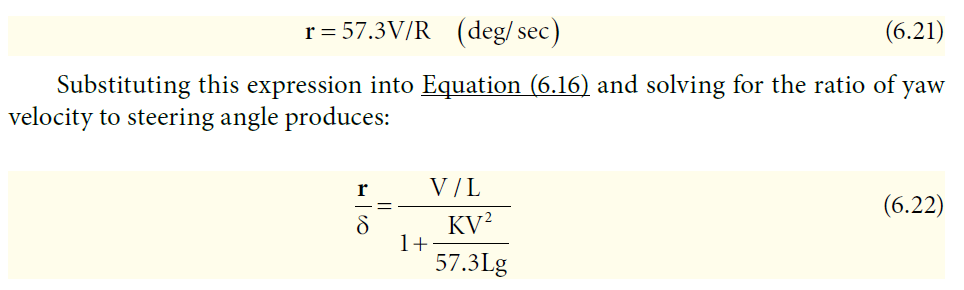

In [78]:
vlist = np.arange(0, 10, 0.1)
Fzflist = []
Fzrlist = []
Klltlist = []
for v in vlist:
    deltaFzf, deltaFzr = delta_F_get(v)
    Fzflist.append(deltaFzf)
    Fzrlist.append(deltaFzr)
    Kllt = (Wf*2*bf*deltaFzf**2)/Calphaf - (Wr*2*br*deltaFzr**2)/Calphar
    Klltlist.append(Kllt)
    
plt.figure(figsize=(14, 10))
plt.plot(vlist, Fzflist , label="Change in Vertical Force on the Front Wheels",color='blue')
plt.plot(vlist, Fzrlist , label="Change in Vertical Force on the Rear Wheels",color='green')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Change in vertical force on the wheels [N}]")
plt.title("Change in vertical force on the wheels against velocity of the vehicle")
plt.grid(True)
plt.legend()
plt.show()

alist = (vlist**2)/(R*g)

plt.figure(figsize=(14, 10))
plt.plot(alist, Klltlist , label="Lateral Load Transfer Understeer Coefficient",color='red')
plt.xlabel("Velocity [m/s]")
plt.ylabel("Understeer Coefficient Kllt [deg/g]")
plt.title("Lateral Load Transfer Understeer Coefficient against Lateral Acceleration")
plt.grid(True)
plt.legend()
plt.show()

# Understeer Effect from Drivetrain

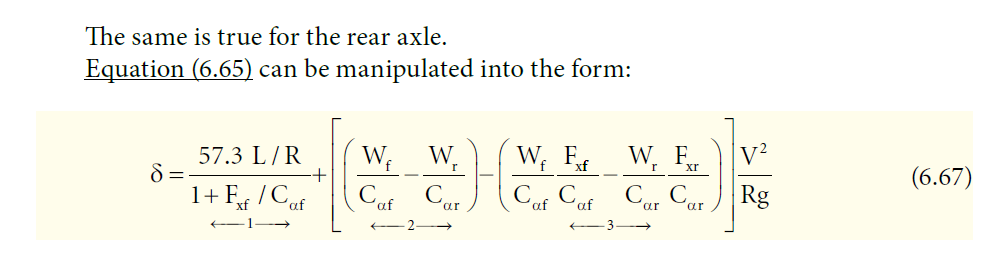

In [83]:
Tm = 20 #Nm

gearbox = 5.15
chain = 2.2
CVTmax = 3.83
CVTmin = 0.76
split = 0.5
Kdrivelist = []
Neutlist = []

CVTrange = np.arange(CVTmin, CVTmax, 0.01)
for CVT in CVTrange:
    Fxr = 0.07*Tm*chain*gearbox*CVT*split/rollrad
    Fxf = 0.07*Tm*chain*gearbox*CVT*(1-split)/rollrad
    Kdrive = -1*((Wf/Calphaf)*(Fxf/Calphaf)-(Wr/Calphar)*(Fxr/Calphar))
    Kdrivelist.append(Kdrive)
    Neut = 57.3*(L/R)/(1+Fxf/Calphaf)
    Neutlist.append(Neut)
    
plt.figure(figsize=(14, 10))
plt.plot(CVTrange, Kdrivelist , label="Drivetrain Related Understeer Coefficient",color='lime')
plt.xlabel("CVT ratio")
plt.ylabel("Understeer Coefficient Kdrive [deg/g]")
plt.title("Drivetrain Related Understeer Coefficient against CVT setting")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(14, 10))
plt.plot(CVTrange, Neutlist , label="Drivetrain Related Understeer Coefficient",color='orange')
plt.xlabel("CVT ratio")
plt.ylabel("Neutral steer Ackermann Angle [deg]")
plt.title("Drivetrain Related Understeer Coefficient against CVT setting")
plt.grid(True)
plt.legend()
plt.show()

# Including effects of lateral load transfer, diff and longitudinal forces

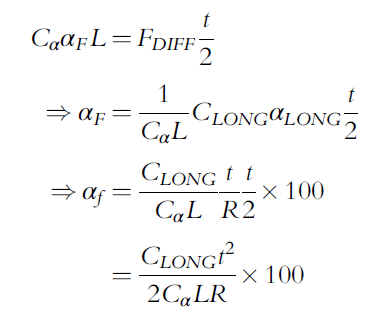

In [80]:
Clong = 54 #N/%
split = 0.5
Acklist = []
vlist = np.arange(0, 20, 0.1)
for v in vlist:
    Kcs = (Wf/Calphaf - Wr/Calphar) #Kcs
    
    deltaFzf, deltaFzr = delta_F_get(v)
    Kllt = (Wf*2*bf*deltaFzf**2)/Calphaf - (Wr*2*br*deltaFzr**2)/Calphar #Kllt

    Fxr = 0.07*Tm*chain*gearbox*((CVTmin+CVTmax)/2)*split/rollrad
    Fxf = 0.07*Tm*chain*gearbox*((CVTmin+CVTmax)/2)*(1-split)/rollrad
    Kdrive = -1*((Wf/Calphaf)*(Fxf/Calphaf)-(Wr/Calphar)*(Fxr/Calphar)) #Kdrive
    
    AckAngle = (57.3*(L/R))/(1+Fxf/Calphaf)+((50*Clong*track**2)/(Calphar*L*R))+(Kcs+Kllt+Kdrive)*(v**2/(g*R))
    Acklist.append(AckAngle)
print(Fxr)
print(Fxf)
print(((50*Clong*track**2)/(Calphar*L*R)))
Neutral = np.ones(len(Acklist))*57.3*(L/R)/(1+Fxf/Calphaf)
plt.figure(figsize=(14, 10))
plt.plot(vlist, Acklist, label="Ackermann Angle (Delta)",color='red')
plt.plot(vlist, Neutral, label = "Neutral steering line",color='black')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Ackermann Angle (Delta in degrees)")
plt.title("Ackermann Angle vs Velocity")
plt.grid(True)
plt.legend()
plt.show()

48.1525
48.1525
3.1475491371717585


In [81]:
Clong = 54 #N/%

Acklist = []
Al_list = []
vlist = np.arange(0, 10, 0.1)
for v in vlist:
    Kcs = (Wf/Calphaf - Wr/Calphar) #Kcs
    
    deltaFzf, deltaFzr = delta_F_get(v)
    Kllt = (Wf*2*bf*deltaFzf**2)/Calphaf - (Wr*2*br*deltaFzr**2)/Calphar #Kllt

    Fxr = 0.07*Tm*chain*gearbox*((CVTmin+CVTmax)/2)*split/rollrad
    Fxf = 0.07*Tm*chain*gearbox*((CVTmin+CVTmax)/2)*(1-split)/rollrad
    Kdrive = -1*((Wf/Calphaf)*(Fxf/Calphaf)-(Wr/Calphar)*(Fxr/Calphar)) #Kdrive
    
    AckAngle = (57.3*(L/R))/(1+Fxf/Calphaf)+((50*Clong*track**2)/(Calphar*L*R))+(Kcs+Kllt+Kdrive)*(v**2/(g*R))
    Acklist.append(AckAngle)
    Al_list.append((v**2/(g*R)))


plt.figure(figsize=(14, 10))
plt.plot(Al_list, Acklist, label="Ackermann Angle (Delta)",color='red')
plt.xlabel("Lateral Acceleration [g]")
plt.ylabel("Ackermann Angle (Delta in degrees)")
plt.title("Ackermann Angle vs Lateral Acceleration")
plt.grid(True)
plt.legend()
plt.show()

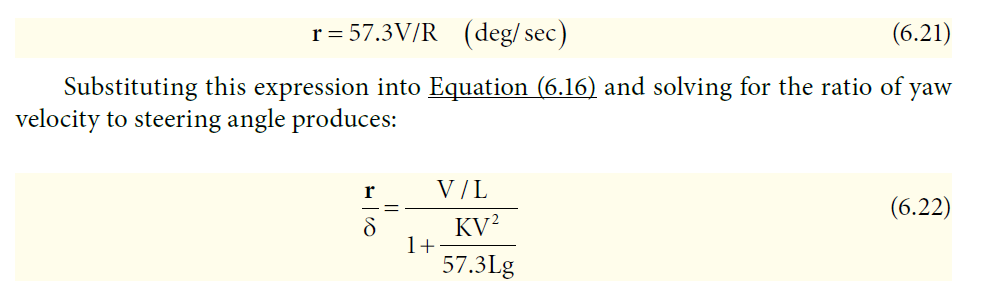

In [82]:
Clong = 54 #N/%

Acklist = []
yaw_list = []
Neutlist = []
vlist = np.arange(0, 15, 0.1)
for v in vlist:
    Kcs = (Wf/Calphaf - Wr/Calphar) #Kcs
    
    deltaFzf, deltaFzr = delta_F_get(v)
    Kllt = (Wf*2*bf*deltaFzf**2)/Calphaf - (Wr*2*br*deltaFzr**2)/Calphar #Kllt

    Fxr = 0.05*Tm*chain*gearbox*((CVTmin+CVTmax)/2)*split/rollrad
    Fxf = 0.05*Tm*chain*gearbox*((CVTmin+CVTmax)/2)*(1-split)/rollrad
    Kdrive = -1*((Wf/Calphaf)*(Fxf/Calphaf)-(Wr/Calphar)*(Fxr/Calphar)) #Kdrive
    
    AckAngle = (57.3*(L/R))/(1+Fxf/Calphaf)+((50*Clong*track**2)/(Calphar*L*R))+(Kcs+Kllt+Kdrive)*(v**2/(g*R))
    yaw_rate = 57.3*(v/R)
    Neutral = (1/L)*v
    yaw_gain = yaw_rate/AckAngle
    
    Acklist.append(AckAngle)
    yaw_list.append(yaw_gain)
    Neutlist.append(Neutral)

plt.figure(figsize=(14, 10))
plt.plot(vlist, yaw_list, label="Yaw Velocity Gain (r/delta)",color='red')
plt.plot(vlist, Neutlist, label="Neutral Steer Line for Yaw Velocity Gain",color='black')
plt.xlabel("Vehicle Velocity [m/s]")
plt.ylabel("Yaw Velocity Gain (r/delta)")
plt.title("Yaw Velocity Gain vs Vehicle Velocity")
plt.grid(True)
plt.legend()
plt.show()

# Measured Data

# Data Extraction

In [ ]:
#Copied code from Wietsche
# -*- coding: utf-8 -*-
"""
Created on Wed Aug  2 10:12:48 2017

@author: User
"""
import numpy as np
from collections import namedtuple
def readV3( filename ):
    
    fid = open(filename, "rb")
    
    Version = np.fromfile(fid, dtype=np.uint16,count=1)
    print("Version",Version[0])
    if(Version[0] == 3):
        ch = [1];
        HeaderRead = 0
        temp=[0, 0, 0]
        stop = 0;
        Data =[]
        while (ch[0] != "") & (stop == 0):
            ch = np.fromfile(fid, dtype=np.uint8,count=1)
            if(ch[0]==""):
                break;
            if((ch[0]==int('0xA0',16)) & (HeaderRead==0)):
                temp[0] = ch[0];
            elif((ch[0]==int('0xA1',16)) & (temp[0] == int('0xA0',16))):    
                temp[1] = ch[0];
            elif((ch[0]==int('0xA2',16)) & (temp[0] == int('0xA0',16)) & (temp[1] == int('0xA1',16))):   
                temp[2] = ch[0];
            elif((ch[0]==int('0xA3',16)) & (temp[0] == int('0xA0',16)) & (temp[1] == int('0xA1',16)) & (temp[2] == int('0xA2',16))):    
                
                print('start Header')
                HeaderRead = 1
                SFRead = 0
                temp2=[0, 0, 0]
                temp=[0, 0, 0]
                temp3=[0, 0, 0]
                Nchannelset = 0
                Channel = namedtuple('Channel', ['ChannelName','ChannelNumber','Data','time'])
                ChannelFound = 0;
                NChannel = -1;
                while stop != 1:
                    ch = np.fromfile(fid, dtype=np.uint8,count=1)
                    if(ch[0]==""):
                        break;
                        

                    if((ch[0]==int('0xB0',16)) & (HeaderRead==1)):
                        temp[0] = ch[0];
                    elif((ch[0]==int('0xB1',16)) & (temp[0] == int('0xB0',16))):    
                        temp[1] = ch[0];
                    elif((ch[0]==int('0xB2',16)) & (temp[0] == int('0xB0',16)) & (temp[1] == int('0xB1',16))):   
                        temp[2] = ch[0];
                    elif((ch[0]==int('0xB3',16)) & (temp[0] == int('0xB0',16)) & (temp[1] == int('0xB1',16)) & (temp[2] == int('0xB2',16))):
                        print('stop Header')
                    else:
                        temp=[0, 0, 0]
                        
                    if(SFRead == 0):
                        if((ch[0]==int('0xC0',16)) ):
                            temp2[0] = ch[0];
                        elif((ch[0]==int('0xC1',16)) & (temp2[0] == int('0xC0',16))):  
                            SFtemp = np.fromfile(fid, dtype=np.float32,count=1)[0]
                            temp2[1] = ch[0];
                        elif((temp2[1]==int('0xC1',16)) & (temp2[0] == int('0xC0',16)) & (ch[0] == int('0xD0',16))):
                            temp2[2] = ch[0];
                        elif((temp2[1]==int('0xC1',16)) & (temp2[0] == int('0xC0',16)) & (temp2[2] == int('0xD0',16))& (ch[0] == int('0xD1',16))):
                            SF = SFtemp
                            SFRead = 1
                            print('SF = ',SF)
                            temp2=[0, 0, 0]
                            
                            
                    if(Nchannelset == 0):
                        if((ch[0]==int('0xC2',16)) ):
                            temp2[0] = ch[0];
                        elif((ch[0]==int('0xC3',16)) & (temp2[0] == int('0xC2',16))):  
                            NChanneltemp = np.fromfile(fid, dtype=np.uint8,count=1)[0]
                            temp2[1] = ch[0];
                        elif((temp2[1]==int('0xC3',16)) & (temp2[0] == int('0xC2',16)) & (ch[0] == int('0xD2',16))):
                            temp2[2] = ch[0];
                        elif((temp2[1]==int('0xC3',16)) & (temp2[0] == int('0xC2',16)) & (temp2[2] == int('0xD2',16))& (ch[0] == int('0xD3',16))):
                            NChannel = NChanneltemp
                            Nchannelset = 1
                            print('NChannel = ',NChannel)
                            temp2=[0, 0, 0]            
                    
                
                    if(Nchannelset == 1):
                        if((ch[0]==int('0xC4',16)) ):
                            temp2[0] = ch[0];
                        elif((ch[0]==int('0xC5',16)) & (temp2[0] == int('0xC4',16))):  
                            ChannelNumTemp = np.fromfile(fid, dtype=np.uint8,count=1)[0]
                            ChannelNameLenTemp = np.fromfile(fid, dtype=np.uint8,count=1)[0]
                            NameTemp = fid.read(ChannelNameLenTemp)  
                            temp2[1] = ch[0];
                        elif((temp2[1]==int('0xC5',16)) & (temp2[0] == int('0xC4',16)) & (ch[0] == int('0xD5',16))):
                            temp2[2] = ch[0];
                        elif((temp2[1]==int('0xC5',16)) & (temp2[0] == int('0xC4',16)) & (temp2[2] == int('0xD5',16))& (ch[0] == int('0xD6',16))):
                            ChannelNum = ChannelNumTemp
                            Name = NameTemp
                            print('Name = ',Name)
                            temp2=[0, 0, 0]
                            Data.append(Channel(Name.decode("utf-8") , ChannelNum, np.array([]),np.array([]) ) )
                            ChannelFound+=1
                            k = 0;
                
                    if(ChannelFound == NChannel ):
                        if((ch[0]==int('0xE0',16)) & (HeaderRead==1)):
                            temp3[0] = ch[0];
                        elif((ch[0]==int('0xE1',16)) & (temp3[0] == int('0xE0',16))):    
                            temp3[1] = ch[0];
                        elif((ch[0]==int('0xE2',16)) & (temp3[0] == int('0xE0',16)) & (temp3[1] == int('0xE1',16))):   
                            temp3[2] = ch[0];
                        elif((ch[0]==int('0xE3',16)) & (temp3[0] == int('0xE0',16)) & (temp3[1] == int('0xE1',16)) & (temp3[2] == int('0xE2',16))):
                            print('start Data')
                            DataStart = fid.tell()
                            fid.seek(-4,2) # move the cursor to the end of the file
                            size = fid.tell()
                            NumPoints = (int)((size-DataStart)/NChannel/2);
                            time = np.array(range(0,NumPoints))/SF
                            fp = np.memmap(filename, offset=DataStart, dtype='int16', mode='r', shape=(NumPoints,NChannel))
                            #fp = np.memmap(filename, offset=DataStart, dtype='int16', mode='r')
                            arr = np.array(fp[:]);
                            arr = arr.astype('float');
                            arr = (arr*10)/32768
                            for i in range(0,NChannel):
                                Data[i] = Data[i]._replace(Data=arr[:,i])
                                Data[i] = Data[i]._replace(time=time)
                            stop = 1  
                        else:
                            temp3=[0, 0, 0]        
                
                
                
                
                
                
                
                
                
                
                
                
                
                
                
            else:
                temp =[0, 0, 0]
    return Data

# Calibration and Formulae

In [ ]:
from scipy.fft import fft, ifft
def Vtodisp(V): 
    disp = (136.03*V-5.7914) - 60.45945946
    return disp

def theta_w(x):
    theta = (0.0043*(x**2) - 0.8466*x -1.6943)
    return theta

def AAngle(x):
        sigma_i = np.deg2rad(theta_w(-1*x))
        sigma_0 = np.deg2rad(theta_w(x))
        AckAngle = np.arctan(1/(((1/(np.tan(sigma_o)))+(1/(np.tan(sigma_i))))/2))
        return AckAngle
    
def Gx(V):
    g = 2.0304*V-5.1095
    return g

def Gy(V):
    g = 2.0196*V-4.9944
    return g

def Gz(V):
    g = 2.0066*V-5.139
    return g

import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def perform_fft(data_values, time_values):
    data_values = np.array(data_values)
    time_values = np.array(time_values)

    sampling_rate = 1000 #Hz
    dt = 1 / sampling_rate  

    fft_result = np.fft.fft(data_values)
    N = len(data_values)
    frequencies = np.fft.fftfreq(N, dt)
    magnitude = np.abs(fft_result)

    return frequencies, magnitude

# First set of tests

# Polaris CV joints 5m Constant Radius Test CCW

In [ ]:
Test5m = readV3('C:\\Users\\Rialdo\\Desktop\\Rialdo Roeloffze Student\\Semester 2 2024\\MRN 422\\Experimental Data\\Constant Radius Tests 2024-09-27\\5m\\Constant Radius 5m CCW better.bin')

# Steering angle vs time 5m CCW

In [ ]:
Vrack = Test5m[0][2]
Vrack_adj = Vrack+0.05
print(Vrack)
print(Vrack_adj)
t5m = Test5m[0][3]
print(t5m)

rack_disp = Vtodisp(Vrack_adj)
print(rack_disp)
steer5m = np.rad2deg(AAngle(theta_w(rack_disp))) 

frequencies, magnitude = perform_fft(steer5m, t5m)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude)
plt.xlim(0, 500)  
plt.title('FFT of Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

In [ ]:
Vrack = Test5m[0][2]
Vrack_adj = Vrack+0.05
print(Vrack)
print(Vrack_adj)
t5m = Test5m[0][3]
print(t5m)

rack_disp = Vtodisp(Vrack_adj)
print(rack_disp)
steer5m = np.rad2deg(AAngle(theta_w(rack_disp))) 
print(steer5m)

fft_vals = fft(steer5m)
fft_freq = np.fft.fftfreq(len(steer5m), d=(t5m[1] - t5m[0])) 

threshold = 10 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

steer5m_smoothed = np.real(ifft(fft_vals_filtered))


start = 100 
end = 150

time_mask = (t5m >= start) & (t5m <= end)
t5m_filtered = t5m[time_mask]
steer5m_raw = steer5m[time_mask]
steer5m_filtered = steer5m_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t5m_filtered, steer5m_raw, label='Test 1 Steering Angles Unfiltered CRT 5m CCW',color = 'teal')
plt.plot(t5m_filtered, steer5m_filtered, label='Test 1 Steering Angles Filtered CRT 5m CCW',color = 'Orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Steering angle [degrees]')
plt.grid()
plt.show()

# Lateral Acceleration versus time on the same interval 5m

In [ ]:
lateral_acc = Test5m[2][2]
print(lateral_acc)
t5m = Test5m[2][3]
print(t5m)
lateral_acc5 = Gy(lateral_acc)*9.81
print(lateral_acc5)

frequencies, magnitude = perform_fft(lateral_acc5, t5m)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude)
plt.xlim(0, 500)  
plt.title('FFT of Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

In [ ]:
lateral_acc = Test5m[2][2]
print(lateral_acc)
t5m = Test5m[2][3]
print(t5m)
lateral_acc5 = Gy(lateral_acc)*9.81
print(lateral_acc5)

fft_vals = fft(lateral_acc5)
fft_freq = np.fft.fftfreq(len(lateral_acc5), d=(t5m[1] - t5m[0])) 

threshold = 5 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

lateral_acc5_smoothed = np.real(ifft(fft_vals_filtered))


start = 100 
end = 150

time_mask = (t5m >= start) & (t5m <= end)
t5m_filtered = t5m[time_mask]
lateral_acc5_raw = lateral_acc5[time_mask]
lateral_acc5_filtered = lateral_acc5_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t5m_filtered, lateral_acc5_raw, label='Test 1 Lateral Acceleration Unfiltered CRT 5m CCW',color = 'teal')
plt.plot(t5m_filtered, lateral_acc5_filtered, label='Test 1 Lateral Acceleration Voltage CRT 5m CCW',color='orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Lateral Acceleration [m/s^2]')
plt.grid()
plt.show()

# Steering Angle vs Velocity (From lateral Acceleration) 5m

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(np.sqrt(lateral_acc5_filtered*9.81*(5+track/2)), steer5m_filtered, label='Test 1 Steering angle vs Velocity CRT 5m CCW')
neutral_line5 = 57.3*wheelbase/(5+track/2)*np.ones(len(steer5m))
plt.plot(np.linspace(0, 20, len(steer5m)),neutral_line5, color = 'black', label='Neutral Steer Line')
plt.legend()
plt.xlabel('velocity [m/s]')
plt.ylabel('Steering angle [Degrees]')
plt.grid()
plt.show()

# Polaris CV joints 6m constant radius test CCW

In [ ]:
Test6m = readV3('C:\\Users\\Rialdo\\Desktop\\Rialdo Roeloffze Student\\Semester 2 2024\\MRN 422\\Experimental Data\\Constant Radius Tests 2024-09-27\\6m\\Constant Radius 6m CCW.bin')

In [ ]:
Vrack = Test6m[0][2]
Vrack_adj = Vrack+0.05
print(Vrack)
print(Vrack_adj)
t6m = Test6m[0][3]
print(t6m)

rack_disp = Vtodisp(Vrack_adj)
print(rack_disp)
steer6m = np.rad2deg(AAngle(theta_w(rack_disp))) 
print(steer6m)

fft_vals = fft(steer6m)
fft_freq = np.fft.fftfreq(len(steer6m), d=(t6m[1] - t6m[0])) 

threshold = 50 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

steer6m_smoothed = np.real(ifft(fft_vals_filtered))


start = 50 
end = 100

time_mask = (t6m >= start) & (t6m <= end)
t6m_filtered = t6m[time_mask]
steer6m_raw = steer6m[time_mask]
steer6m_filtered = steer6m_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t6m_filtered, steer6m_raw, label='Test 2 Steering Angles Unfiltered CRT 6m CCW',color = 'teal')
plt.plot(t6m_filtered, steer6m_filtered, label='Test 2 Steering Angles Filtered CRT 6m CCW',color = 'red')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Steering angle [degrees]')
plt.grid()
plt.show()

# Lateral Acceleration versus time on the same interval 6m

In [ ]:
lateral_acc = Test6m[2][2]
print(lateral_acc)
t6m = Test6m[2][3]
print(t6m)
lateral_acc6 = 2*9.81*((lateral_acc)-2.425) 
print(lateral_acc6)

fft_vals = fft(lateral_acc6)
fft_freq = np.fft.fftfreq(len(lateral_acc6), d=(t6m[1] - t6m[0])) 

threshold = 5 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

lateral_acc6_smoothed = np.real(ifft(fft_vals_filtered))


start = 50 
end = 100

time_mask = (t6m >= start) & (t6m <= end)
t6m_filtered = t6m[time_mask]
lateral_acc6_raw = lateral_acc6[time_mask]
lateral_acc6_filtered = lateral_acc6_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t6m_filtered, lateral_acc6_raw, label='Test 2 Lateral Acceleration Unfiltered CRT 6m CCW',color = 'teal')
plt.plot(t6m_filtered, lateral_acc6_filtered, label='Test 2 Lateral Acceleration Filtered CRT 6m CCW', color = 'red')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Lateral Acceleration [m/s^2]')
plt.grid()
plt.show()

# Steering Angle vs Velocity (From lateral Acceleration) 6m

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(np.sqrt(lateral_acc6_filtered*9.8*(6+track/2)), steer6m_filtered, label='Test 3 Steering angle vs Velocity CRT 6m CCW',color='red')
neutral_line6 = 57.3*wheelbase/(6+track/2)*np.ones(len(steer6m))
plt.plot(np.linspace(0, 25, len(steer6m)),neutral_line6, color = 'black', label='Neutral Steer Line')
plt.legend()
plt.xlabel('velocity [m/s]')
plt.ylabel('Steering angle [Degrees]')
plt.grid()
plt.show()

# Polaris CV joints 7m constant radius test CCW

In [ ]:
Test7m = readV3('C:\\Users\\Rialdo\\Desktop\\Rialdo Roeloffze Student\\Semester 2 2024\\MRN 422\\Experimental Data\\Constant Radius Tests 2024-09-27\\7m\\Constant Radius 7m CCW.bin')

In [ ]:
Vrack = Test7m[0][2]
Vrack_adj = Vrack+0.05
print(Vrack)
print(Vrack_adj)
t7m = Test7m[0][3]
print(t7m)

rack_disp = Vtodisp(Vrack_adj)
print(rack_disp)
steer7m = np.rad2deg(AAngle(theta_w(rack_disp))) 
print(steer7m)

fft_vals = fft(steer7m)
fft_freq = np.fft.fftfreq(len(steer7m), d=(t7m[1] - t7m[0])) 

threshold = 50 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

steer7m_smoothed = np.real(ifft(fft_vals_filtered))


start = 3 
end = 80

time_mask = (t7m >= start) & (t7m <= end)
t7m_filtered = t7m[time_mask]
steer7m_raw = steer7m[time_mask]
steer7m_filtered = steer7m_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t7m_filtered, steer7m_raw, label='Test 3 Steering Angles Unfiltered CRT 7m CCW',color = 'teal')
plt.plot(t7m_filtered, steer7m_filtered, label='Test 3 Steering Angles Filtered CRT 7m CCW',color = 'purple')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Steering angle [degrees]')
plt.grid()
plt.show()

# Lateral Acceleration versus time on the same interval 7m

In [ ]:
lateral_acc = Test7m[2][2]
print(lateral_acc)
t7m = Test7m[2][3]
print(t7m)
lateral_acc7 = 2*9.81*((lateral_acc)-2.425) 
print(lateral_acc7)

fft_vals = fft(lateral_acc7)
fft_freq = np.fft.fftfreq(len(lateral_acc7), d=(t7m[1] - t7m[0])) 

threshold = 5 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

lateral_acc7_smoothed = np.real(ifft(fft_vals_filtered))


start = 3 
end = 80

time_mask = (t7m >= start) & (t7m <= end)
t7m_filtered = t7m[time_mask]
lateral_acc7_raw = lateral_acc7[time_mask]
lateral_acc7_filtered = lateral_acc7_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t7m_filtered, lateral_acc7_raw, label='Test 3 Lateral Acceleration Unfiltered CRT 7m CCW',color = 'teal')
plt.plot(t7m_filtered, lateral_acc7_filtered, label='Test 3 Lateral Acceleration Voltage CRT 7m CCW', color = 'purple')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Lateral Acceleration [m/s^2]')
plt.grid()
plt.show()

# Steering Angle vs Velocity (From lateral Acceleration) 7m

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(np.sqrt(lateral_acc7_filtered*9.8*(7+track/2)), steer7m_filtered, label='Test 3 Steering angle vs Velocity CRT 7m CCW',color='green')
neutral_line7 = 57.3*wheelbase/(7+track/2)*np.ones(len(steer7m))
plt.plot(np.linspace(0, 15, len(steer7m)),neutral_line7, color = 'black', label='Neutral Steer Line')
plt.legend()
plt.xlabel('velocity [m/s]')
plt.ylabel('Steering angle [Degrees]')
plt.grid()
plt.show()

# Friction circle from tests

In [ ]:
long_acc5 = Test5m[1][2]
long_acc5 = 2*((long_acc5)-2.445) 

fft_vals = fft(long_acc5)
fft_freq = np.fft.fftfreq(len(long_acc5), d=(t5m[1] - t5m[0])) 

threshold = 5 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

long_acc5_smoothed = np.real(ifft(fft_vals_filtered))


start = 100 
end = 150

time_mask = (t5m >= start) & (t5m <= end)
t5m_filtered = t5m[time_mask]
long_acc5_filtered = long_acc5_smoothed[time_mask]

########################################################################

long_acc6 = Test6m[1][2]
long_acc6 = 2*((long_acc6)-2.445) 

fft_vals = fft(long_acc6)
fft_freq = np.fft.fftfreq(len(long_acc6), d=(t6m[1] - t6m[0])) 

threshold = 5 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

long_acc6_smoothed = np.real(ifft(fft_vals_filtered))


start = 50 
end = 100

time_mask = (t6m >= start) & (t6m <= end)
t6m_filtered = t6m[time_mask]
long_acc6_filtered = long_acc6_smoothed[time_mask]

##########################################################################

long_acc7 = Test7m[1][2]
long_acc7 = 2*((long_acc7)-2.445) 

fft_vals = fft(long_acc7)
fft_freq = np.fft.fftfreq(len(long_acc7), d=(t7m[1] - t7m[0])) 

threshold = 5 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

long_acc7_smoothed = np.real(ifft(fft_vals_filtered))


start = 3 
end = 80

time_mask = (t7m >= start) & (t7m <= end)
t7m_filtered = t7m[time_mask]
long_acc7_filtered = long_acc7_smoothed[time_mask]

In [ ]:
plt.figure(figsize=(16, 10))

plt.plot(lateral_acc5_filtered/9.81, long_acc5_filtered, label='Test 1 Lateral Acceleration vs longitudinal acceleration', color = 'blue')
plt.plot(lateral_acc6_filtered/9.81, long_acc6_filtered, label='Test 2 Lateral Acceleration vs longitudinal acceleration', color = 'red')
plt.plot(lateral_acc7_filtered/9.81, long_acc7_filtered, label='Test 3 Lateral Acceleration vs longitudinal acceleration', color = 'green')
plt.legend()
plt.xlabel('Lateral acceleration [m/s^2]')
plt.ylabel('Longitudinal Acceleration [m/s^2]')
plt.grid()
plt.show()

# Second set of tests

# Test 1:

# Polaris CV joints 5m Constant Radius Test CCW Test 1

In [ ]:
Test1_5m = readV3('C:\\Users\\Rialdo\\Desktop\\Rialdo Roeloffze Student\\Semester 2 2024\\MRN 422\\Experimental Data\\Constant Radius Tests 2024-10-24\\Test1 Neutral 5m.bin')

# Steering angle vs time 5m CCW for Test 1

In [ ]:
Vrack = Test1_5m[0][2]
Vrack_adj = Vrack - 0.043
print(Vrack)
print(Vrack_adj)
t1 = Test1_5m[0][3]
print(t1)

rack_disp = Vtodisp(Vrack_adj)
print(rack_disp)
steer1 = np.rad2deg(AAngle(theta_w(rack_disp))) 
print(steer1) 

frequencies, magnitude = perform_fft(steer1, t1)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude)
plt.xlim(0, 500)  
plt.title('FFT of Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

In [ ]:
Vrack = Test1_5m[0][2]
Vrack_adj = Vrack - 0.043
print(Vrack)
print(Vrack_adj)
t1 = Test1_5m[0][3]
print(t1)

rack_disp = Vtodisp(Vrack_adj)
print(rack_disp)
steer1 = np.rad2deg(AAngle(theta_w(rack_disp))) 
print(steer1)

fft_vals = fft(steer1)
fft_freq = np.fft.fftfreq(len(steer1), d=(t1[1] - t1[0])) 

threshold = 10 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

steer1_smoothed = np.real(ifft(fft_vals_filtered))


start = 20 
end = 85

time_mask = (t1 >= start) & (t1 <= end)
t1_filtered = t1[time_mask]
steer1_raw = steer1[time_mask]
steer1_filtered = steer1_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t1_filtered, steer1_raw, label='Test 1 Steering Angles Unfiltered CRT 5m CCW',color = 'blue')
plt.plot(t1_filtered, steer1_filtered, label='Test 1 Steering Angles Filtered CRT 5m CCW',color = 'Orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Steering angle [degrees]')
plt.grid()
plt.show()

# Lateral Acceleration versus time on the same interval 5m for Test 1

In [ ]:
lateral_acc = Test1_5m[4][2]
print(lateral_acc)
t1 = Test1_5m[4][3]
print(t1)
lateral_acc1 = Gy(lateral_acc)*9.81
print(lateral_acc1)

frequencies, magnitude = perform_fft(lateral_acc, t1)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude)
plt.xlim(0, 500)  
plt.title('FFT of Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

In [ ]:
lateral_acc = Test1_5m[4][2]
print(lateral_acc)
t1 = Test1_5m[4][3]
print(t1)
lateral_acc1 = Gy(lateral_acc)*9.81
print(lateral_acc1)

fft_vals = fft(lateral_acc1)
fft_freq = np.fft.fftfreq(len(lateral_acc1), d=(t1[1] - t1[0])) 

threshold = 10 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

lateral_acc1_smoothed = np.real(ifft(fft_vals_filtered))


start = 20
end = 85

time_mask = (t1 >= start) & (t1 <= end)
t1_filtered = t1[time_mask]
lateral_acc1_raw = lateral_acc1[time_mask]
lateral_acc1_filtered = lateral_acc1_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t1_filtered, lateral_acc1_raw, label='Test 1 Lateral Acceleration Unfiltered CRT 5m CCW',color = 'blue')
plt.plot(t1_filtered, lateral_acc1_filtered, label='Test 1 Lateral Acceleration Filtered CRT 5m CCW',color='orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Lateral Acceleration [m/s^2]')
plt.grid()
plt.show()

# Wheel speed during Test 1

In [ ]:
RTR_V1 = Test1_5m[7][2]
print(RTR_V1)
t1 = Test1_5m[7][3]
print(t1)
Wheel_Spd_1_Conv = RTR_V1*2*np.pi*rollrad

fft_vals = fft(Wheel_Spd_1_Conv)
fft_freq = np.fft.fftfreq(len(Wheel_Spd_1_Conv), d=(t1[1] - t1[0])) 

threshold = 3
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

VS1_smoothed = np.real(ifft(fft_vals_filtered))


start = 20
end = 85

time_mask = (t1 >= start) & (t1 <= end)
t1_filtered = t1[time_mask]
VS1_raw = Wheel_Spd_1_Conv[time_mask]
VS1_filtered = VS1_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t1_filtered, VS1_raw, label='Test 1 Vehicle Speed Unfiltered CRT 5m CCW',color = 'blue')
plt.plot(t1_filtered, VS1_filtered, label='Test 1 Vehicle Speed Filtered CRT 5m CCW',color='orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('vehicle speed [m/s]')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(VS1_raw, steer1_raw, label='Test 1 Steering Angles vs Vehicle Speed Unfiltered CRT 5m CCW',color = 'blue')
plt.plot(VS1_filtered, steer1_filtered, label='Test 1 Steering Angles vs Vehicle Speed Filtered CRT 5m CCW',color = 'Orange')
plt.legend()
plt.xlabel('Vehicle Velocity [m/s]')
plt.ylabel('Steering angle [degrees]')
plt.grid()
plt.show()

# Test 2:

# Polaris CV joints 5m Constant Radius Test CCW Test 2

In [ ]:
Test2_5m = readV3('C:\\Users\\Rialdo\\Desktop\\Rialdo Roeloffze Student\\Semester 2 2024\\MRN 422\\Experimental Data\\Constant Radius Tests 2024-10-24\\Test2 Neutral 5m.bin')

# Steering angle vs time 5m CCW for Test 2

In [ ]:
Vrack = Test2_5m[0][2]
Vrack_adj = Vrack - 0.043
print(Vrack)
print(Vrack_adj)
t2 = Test2_5m[0][3]
print(t2)

rack_disp = Vtodisp(Vrack_adj)
print(rack_disp)
steer2 = np.rad2deg(AAngle(theta_w(rack_disp))) 
print(steer2)

fft_vals = fft(steer2)
fft_freq = np.fft.fftfreq(len(steer2), d=(t2[1] - t2[0])) 

threshold = 50 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

steer2_smoothed = np.real(ifft(fft_vals_filtered))


start = 0.1 
end = 58.1

time_mask = (t2 >= start) & (t2 <= end)
t2_filtered = t2[time_mask]
steer2_raw = steer2[time_mask]
steer2_filtered = steer2_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t2_filtered, steer2_raw, label='Test 2 Steering Angles Unfiltered CRT 5m CCW',color = 'green')
plt.plot(t2_filtered, steer2_filtered, label='Test 2 Steering Angles Filtered CRT 5m CCW',color = 'Orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Steering angle [degrees]')
plt.grid()
plt.show()

# Lateral Acceleration versus time on the same interval 5m for Test 2

In [ ]:
lateral_acc = Test2_5m[4][2]
print(lateral_acc)
t2 = Test2_5m[4][3]
print(t2)
lateral_acc2 = Gy(lateral_acc)*9.81
print(lateral_acc2)

fft_vals = fft(lateral_acc2)
fft_freq = np.fft.fftfreq(len(lateral_acc2), d=(t2[1] - t2[0])) 

threshold = 5 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

lateral_acc2_smoothed = np.real(ifft(fft_vals_filtered))


start = 0.1
end = 58.1

time_mask = (t2 >= start) & (t2 <= end)
t2_filtered = t2[time_mask]
lateral_acc2_raw = lateral_acc2[time_mask]
lateral_acc2_filtered = lateral_acc2_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t2_filtered, lateral_acc2_raw, label='Test 2 Lateral Acceleration Unfiltered CRT 5m CCW',color = 'green')
plt.plot(t2_filtered, lateral_acc2_filtered, label='Test 2 Lateral Acceleration Filtered CRT 5m CCW',color='orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Lateral Acceleration [m/s^2]')
plt.grid()
plt.show()

# Wheel speed during Test 2

In [ ]:
RTR_V2 = Test2_5m[7][2]
print(RTR_V2)
t2 = Test2_5m[7][3]
print(t2)
Wheel_Spd_2_Conv = RTR_V2*2*np.pi*rollrad

fft_vals = fft(Wheel_Spd_2_Conv)
fft_freq = np.fft.fftfreq(len(Wheel_Spd_2_Conv), d=(t2[1] - t2[0])) 

threshold = 4
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

VS2_smoothed = np.real(ifft(fft_vals_filtered))


start = 0.1
end = 58.1

time_mask = (t2 >= start) & (t2 <= end)
t2_filtered = t2[time_mask]
VS2_raw = Wheel_Spd_2_Conv[time_mask]
VS2_filtered = VS2_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t2_filtered, VS2_raw, label='Test 2 Vehicle Speed Unfiltered CRT 5m CCW',color = 'green')
plt.plot(t2_filtered, VS2_filtered, label='Test 2 Vehicle Speed Filtered CRT 5m CCW',color='orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('vehicle speed [m/s]')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(VS2_raw, steer2_raw, label='Test 2 Steering Angles vs Vehicle Speed Unfiltered CRT 5m CCW',color = 'green')
plt.plot(VS2_filtered, steer2_filtered, label='Test 2 Steering Angles vs Vehicle Speed Filtered CRT 5m CCW',color = 'Orange')
plt.legend()
plt.xlabel('Vehicle Velocity [m/s]')
plt.ylabel('Steering angle [degrees]')
plt.grid()
plt.show()

# Test 3:

# Polaris CV joints 5m Constant Radius Test CCW Test 3

In [ ]:
Test3_5m = readV3('C:\\Users\\Rialdo\\Desktop\\Rialdo Roeloffze Student\\Semester 2 2024\\MRN 422\\Experimental Data\\Constant Radius Tests 2024-10-24\\Test3 Neutral 5m.bin')

# Steering angle vs time 5m CCW for Test 3

In [ ]:
Vrack = Test3_5m[0][2]
Vrack_adj = Vrack - 0.043
print(Vrack)
print(Vrack_adj)
t3 = Test3_5m[0][3]
print(t3)

rack_disp = Vtodisp(Vrack_adj)
print(rack_disp)
steer3 = np.rad2deg(AAngle(theta_w(rack_disp))) 
print(steer3)

fft_vals = fft(steer3)
fft_freq = np.fft.fftfreq(len(steer3), d=(t3[1] - t3[0])) 

threshold = 50 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

steer3_smoothed = np.real(ifft(fft_vals_filtered))


start = 0.1 
end = 75.3

time_mask = (t3 >= start) & (t3 <= end)
t3_filtered = t3[time_mask]
steer3_raw = steer3[time_mask]
steer3_filtered = steer3_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t3_filtered, steer3_raw, label='Test 3 Steering Angles Unfiltered CRT 5m CCW',color = 'indigo')
plt.plot(t3_filtered, steer3_filtered, label='Test 3 Steering Angles Filtered CRT 5m CCW',color = 'Orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Steering angle [degrees]')
plt.grid()
plt.show()

# Lateral Acceleration versus time on the same interval 5m for Test 1

In [ ]:
lateral_acc = Test3_5m[4][2]
print(lateral_acc)
t3 = Test3_5m[4][3]
print(t3)
lateral_acc3 = Gy(lateral_acc)*9.81
print(lateral_acc3)

fft_vals = fft(lateral_acc3)
fft_freq = np.fft.fftfreq(len(lateral_acc3), d=(t3[1] - t3[0])) 

threshold = 5 
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

lateral_acc3_smoothed = np.real(ifft(fft_vals_filtered))


start = 0.1
end = 75.3

time_mask = (t3 >= start) & (t3 <= end)
t3_filtered = t3[time_mask]
lateral_acc3_raw = lateral_acc3[time_mask]
lateral_acc3_filtered = lateral_acc3_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t3_filtered, lateral_acc3_raw, label='Test 3 Lateral Acceleration Unfiltered CRT 5m CCW',color = 'indigo')
plt.plot(t3_filtered, lateral_acc3_filtered, label='Test 3 Lateral Acceleration Voltage CRT 5m CCW',color='orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Lateral Acceleration [m/s^2]')
plt.grid()
plt.show()

# Wheel speed during Test 3

In [ ]:
RTR_V3 = Test3_5m[7][2]
print(RTR_V3)
t3 = Test3_5m[7][3]
print(t3)
Wheel_Spd_3_Conv = RTR_V3*2*np.pi*rollrad

fft_vals = fft(Wheel_Spd_3_Conv)
fft_freq = np.fft.fftfreq(len(Wheel_Spd_3_Conv), d=(t3[1] - t3[0])) 

threshold = 4
fft_vals_filtered = np.where(np.abs(fft_freq) > threshold, 0, fft_vals)

VS3_smoothed = np.real(ifft(fft_vals_filtered))


start = 0.1
end = 75.3

time_mask = (t3 >= start) & (t3 <= end)
t3_filtered = t3[time_mask]
VS3_raw = Wheel_Spd_3_Conv[time_mask]
VS3_filtered = VS3_smoothed[time_mask]

plt.figure(figsize=(16, 10))
plt.plot(t3_filtered, VS3_raw, label='Test 3 Vehicle Speed Unfiltered CRT 5m CCW',color = 'indigo')
plt.plot(t3_filtered, VS3_filtered, label='Test 3 Vehicle Speed Filtered CRT 5m CCW',color='orange')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('vehicle speed [m/s]')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(VS3_raw, steer3_raw, label='Test 3 Steering Angles vs Vehicle Speed Unfiltered CRT 5m CCW',color = 'indigo')
plt.plot(VS3_filtered, steer3_filtered, label='Test 3 Steering Angles vs Vehicle Speed Filtered CRT 5m CCW',color = 'Orange')
plt.legend()
plt.xlabel('Vehicle Velocity [m/s]')
plt.ylabel('Steering angle [degrees]')
plt.grid()
plt.show()

# Experimental understeer coefficient

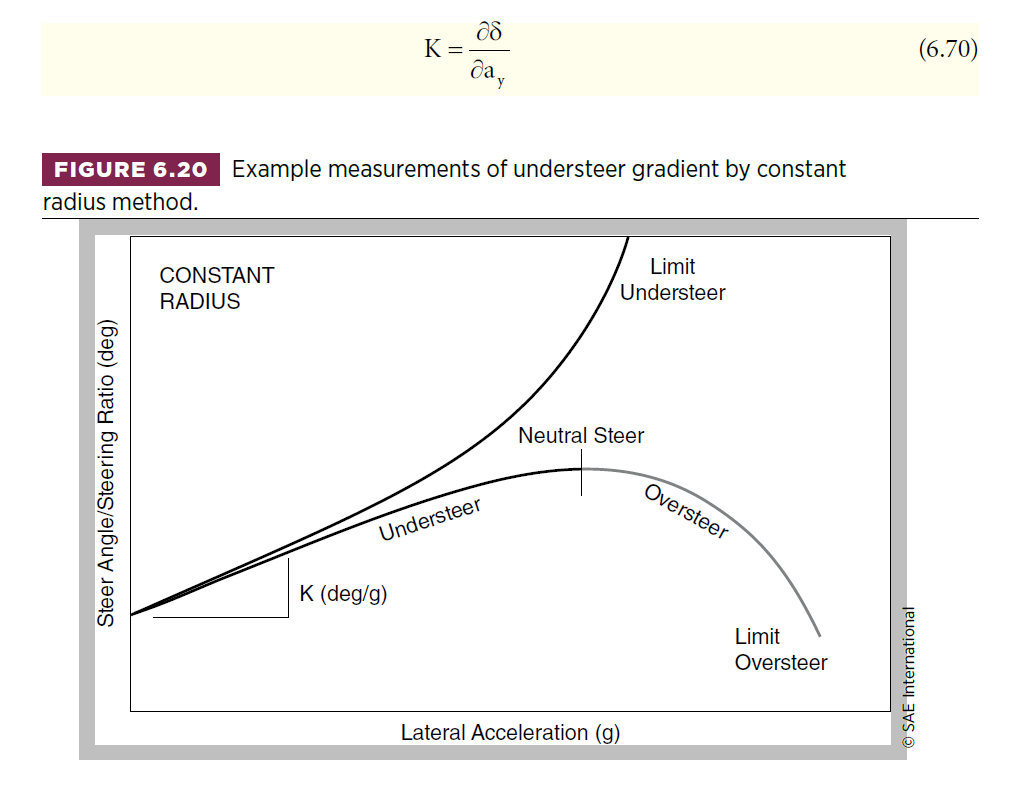

# Trying some things

In [ ]:
start = 27.3
end = 81
R_value = 5+(track/2)
g_value = 9.81

time_mask = (t1 >= start) & (t1 <= end)
t1_filtered = t1[time_mask]

VS1_raw = Wheel_Spd_1_Conv[time_mask]
VS1_filtered = VS1_smoothed[time_mask]

steer1_raw = steer1[time_mask]
steer1_filtered = steer1_smoothed[time_mask]


plt.figure(figsize=(16, 10))
plt.plot(VS1_raw,steer1_raw, label='Test 1 Unfiltered Ackermann Angle vs Vehicle Speed',color = 'blue')
plt.plot(VS1_filtered,steer1_filtered, label='Test 1 Filtered Ackermann Angle vs Vehicle Speed',color = 'Orange')
plt.legend()
plt.xlabel('Vehicle speed [m/s]')
plt.ylabel('Ackermann Steering Angle [deg]')
plt.grid()
plt.show()

In [ ]:
start = 27.3
end = 81

time_mask = (t1 >= start) & (t1 <= end)
t1_filtered = t1[time_mask]

VS1_raw = Wheel_Spd_1_Conv[time_mask]
VS1_filtered = VS1_smoothed[time_mask]

steer1_raw = steer1[time_mask]
steer1_filtered = steer1_smoothed[time_mask]

al1_raw = (VS1_raw**2)/(R_value*g_value)
al1_filtered = (VS1_filtered**2)/(R_value*g_value)

plt.figure(figsize=(16, 10))
plt.plot(al1_raw,steer1_raw, label='Test 1 Unfiltered Ackermann Angle vs Vehicle Lateral Acceleration',color = 'blue')
plt.plot(al1_filtered,steer1_filtered, label='Test 1 Unfiltered Ackermann Angle vs Lateral Acceleration',color = 'Orange')
plt.legend()
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Ackermann Steering Angle [deg]')
plt.grid()
plt.show()

# Test 1

In [ ]:
start = 27.3
end = 81
time_mask = (t1 >= start) & (t1 <= end)

t1_filtered = t1[time_mask]
VS1_raw = Wheel_Spd_1_Conv[time_mask]
VS1_filtered = VS1_smoothed[time_mask]
steer1_raw = steer1[time_mask]
steer1_filtered = steer1_smoothed[time_mask]

al1_raw = (VS1_raw**2) / (R_value * g_value)
al1_filtered = (VS1_filtered**2) / (R_value * g_value)

coefficients = np.polyfit(al1_raw, steer1_raw, 2)
qt1 = np.poly1d(coefficients)

al1_range = np.linspace(min(al1_raw), max(al1_raw), 10000)
tval1 = qt1(al1_range)

plt.figure(figsize=(16, 10))
plt.plot(al1_raw, steer1_raw, label='Test 1 Unfiltered Ackermann Angle vs Vehicle Lateral Acceleration', color='blue')
plt.plot(al1_filtered, steer1_filtered, label='Test 1 Filtered Ackermann Angle vs Vehicle Lateral Acceleration', color='orange')
plt.plot(al1_range, tval1, label=f'Quadratic Trendline: {coefficients[0]:.3f}*x^2 + {coefficients[1]:.3f}*x + {coefficients[2]:.3f}', color='black')

plt.legend()
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Ackermann Steering Angle [deg]')
plt.grid()
plt.show()

print("Quadratic Trendline Coefficients:")
print(f"a (x^2 term): {coefficients[0]:.3e}")
print(f"b (x term): {coefficients[1]:.3e}")
print(f"c (constant term): {coefficients[2]:.3e}")

In [ ]:
start = 29.2
end = 81
time_mask = (t1 >= start) & (t1 <= end)

t1_filtered = t1[time_mask]
VS1_raw = Wheel_Spd_1_Conv[time_mask]
VS1_filtered = VS1_smoothed[time_mask]
steer1_raw = steer1[time_mask]
steer1_filtered = steer1_smoothed[time_mask]

al1_raw = (VS1_raw**2) / (R_value * g_value)
al1_filtered = (VS1_filtered**2) / (R_value * g_value)

coefficients = np.polyfit(al1_raw, steer1_raw, 2)
qt1 = np.poly1d(coefficients)

al1_range = np.linspace(min(al1_raw), max(al1_raw), 10000)
tval1 = qt1(al1_range)

plt.figure(figsize=(16, 10))
plt.plot(al1_raw, steer1_raw, label='Test 1 Unfiltered Ackermann Angle vs Vehicle Lateral Acceleration', color='blue')
plt.plot(al1_filtered, steer1_filtered, label='Test 1 Filtered Ackermann Angle vs Vehicle Lateral Acceleration', color='orange')
plt.plot(al1_range, tval1, label=f'Quadratic Trendline: {coefficients[0]:.3f}*x^2 + {coefficients[1]:.3f}*x + {coefficients[2]:.3f}', color='black')

plt.legend()
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Ackermann Steering Angle [deg]')
plt.grid()
plt.show()

print("Quadratic Trendline Coefficients:")
print(f"a (x^2 term): {coefficients[0]:.3e}")
print(f"b (x term): {coefficients[1]:.3e}")
print(f"c (constant term): {coefficients[2]:.3e}")

In [ ]:
print(qt1)

qd1 = qt1.deriv()
print(qd1)

al1_range = np.linspace(min(al1_raw), max(al1_raw), 10000)
derval1 = qd1(al1_range)

plt.figure(figsize=(16, 10))
plt.plot(al1_range, derval1, label=f'Derivative of Quadratic Trendline 1: {qd1}', color='black')
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Understeer Coefficient [deg/g]')
plt.title('Understeer Coefficient vs Vehicle Lateral Acceleration')
plt.legend()
plt.grid()
plt.show()

# Test 2

In [ ]:
start = 7
end = 57
time_mask = (t2 >= start) & (t2 <= end)

t2_filtered = t2[time_mask]
VS2_raw = Wheel_Spd_2_Conv[time_mask]
VS2_filtered = VS2_smoothed[time_mask]
steer2_raw = steer2[time_mask]
steer2_filtered = steer2_smoothed[time_mask]

al2_raw = (VS2_raw**2) / (R_value * g_value)
al2_filtered = (VS2_filtered**2) / (R_value * g_value)

coefficients = np.polyfit(al2_raw, steer2_raw, 2)
qt2 = np.poly1d(coefficients)

al2_range = np.linspace(min(al2_raw), max(al2_raw), 10000)
tval2 = qt2(al2_range)

plt.figure(figsize=(16, 10))
plt.plot(al2_raw, steer2_raw, label='Test 2 Unfiltered Ackermann Angle vs Vehicle Lateral Acceleration', color='green')
plt.plot(al2_filtered, steer2_filtered, label='Test 2 Filtered Ackermann Angle vs Vehicle Lateral Acceleration', color='orange')
plt.plot(al2_range, tval2, label=f'Quadratic Trendline: {coefficients[0]:.3f}*x^2 + {coefficients[1]:.3f}*x + {coefficients[2]:.3f}', color='black')

plt.legend()
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Ackermann Steering Angle [deg]')
plt.grid()
plt.show()

print("Quadratic Trendline Coefficients:")
print(f"a (x^2 term): {coefficients[0]:.3e}")
print(f"b (x term): {coefficients[1]:.3e}")
print(f"c (constant term): {coefficients[2]:.3e}")

In [ ]:
start = 9.1
end = 57
time_mask = (t2 >= start) & (t2 <= end)

t2_filtered = t2[time_mask]
VS2_raw = Wheel_Spd_2_Conv[time_mask]
VS2_filtered = VS2_smoothed[time_mask]
steer2_raw = steer2[time_mask]
steer2_filtered = steer2_smoothed[time_mask]

al2_raw = (VS2_raw**2) / (R_value * g_value)
al2_filtered = (VS2_filtered**2) / (R_value * g_value)

coefficients = np.polyfit(al2_raw, steer2_raw, 2)
qt2 = np.poly1d(coefficients)

al2_range = np.linspace(min(al2_raw), max(al2_raw), 10000)
tval2 = qt2(al2_range)

plt.figure(figsize=(16, 10))
plt.plot(al2_raw, steer2_raw, label='Test 2 Unfiltered Ackermann Angle vs Vehicle Lateral Acceleration', color='green')
plt.plot(al2_filtered, steer2_filtered, label='Test 2 Filtered Ackermann Angle vs Vehicle Lateral Acceleration', color='orange')
plt.plot(al2_range, tval2, label=f'Quadratic Trendline: {coefficients[0]:.3f}*x^2 + {coefficients[1]:.3f}*x + {coefficients[2]:.3f}', color='black')

plt.legend()
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Ackermann Steering Angle [deg]')
plt.grid()
plt.show()

print("Quadratic Trendline Coefficients:")
print(f"a (x^2 term): {coefficients[0]:.3e}")
print(f"b (x term): {coefficients[1]:.3e}")
print(f"c (constant term): {coefficients[2]:.3e}")

In [ ]:
print(qt2)

qd2 = qt2.deriv()
print(qd2)

al2_range = np.linspace(min(al2_raw), max(al2_raw), 10000)
derval2 = qd2(al2_range)

plt.figure(figsize=(16, 10))
plt.plot(al2_range, derval2, label=f'Derivative of Quadratic Trendline 2: {qd2}', color='black')
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Understeer Coefficient [deg/g]')
plt.title('Understeer Coefficient vs Vehicle Lateral Acceleration')
plt.legend()
plt.grid()
plt.show()

# Test 3

In [ ]:
start = 6.4
end = 72
time_mask = (t3 >= start) & (t3 <= end)

t3_filtered = t3[time_mask]
VS3_raw = Wheel_Spd_3_Conv[time_mask]
VS3_filtered = VS3_smoothed[time_mask]
steer3_raw = steer3[time_mask]
steer3_filtered = steer3_smoothed[time_mask]

al3_raw = (VS3_raw**2) / (R_value * g_value)
al3_filtered = (VS3_filtered**2) / (R_value * g_value)

coefficients = np.polyfit(al3_raw, steer3_raw, 2)
qt3 = np.poly1d(coefficients)

al3_range = np.linspace(min(al3_raw), max(al3_raw), 10000)
tval3 = qt3(al3_range)

plt.figure(figsize=(16, 10))
plt.plot(al3_raw, steer3_raw, label='Test 3 Unfiltered Ackermann Angle vs Vehicle Lateral Acceleration', color='indigo')
plt.plot(al3_filtered, steer3_filtered, label='Test 3 Filtered Ackermann Angle vs Vehicle Lateral Acceleration', color='orange')
plt.plot(al3_range, tval3, label=f'Quadratic Trendline: {coefficients[0]:.3f}*x^2 + {coefficients[1]:.3f}*x + {coefficients[2]:.3f}', color='black')

plt.legend()
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Ackermann Steering Angle [deg]')
plt.grid()
plt.show()

print("Quadratic Trendline Coefficients:")
print(f"a (x^2 term): {coefficients[0]:.3e}")
print(f"b (x term): {coefficients[1]:.3e}")
print(f"c (constant term): {coefficients[2]:.3e}")

In [ ]:
start = 8.7
end = 73
time_mask = (t3 >= start) & (t3 <= end)

t3_filtered = t3[time_mask]
VS3_raw = Wheel_Spd_3_Conv[time_mask]
VS3_filtered = VS3_smoothed[time_mask]
steer3_raw = steer3[time_mask]
steer3_filtered = steer3_smoothed[time_mask]

al3_raw = (VS3_raw**2) / (R_value * g_value)
al3_filtered = (VS3_filtered**2) / (R_value * g_value)

coefficients = np.polyfit(al3_raw, steer3_raw, 2)
qt3 = np.poly1d(coefficients)

al3_range = np.linspace(min(al3_raw), max(al3_raw), 10000)
tval3 = qt3(al3_range)

plt.figure(figsize=(16, 10))
plt.plot(al3_raw, steer3_raw, label='Test 3 Unfiltered Ackermann Angle vs Vehicle Lateral Acceleration', color='indigo')
plt.plot(al3_filtered, steer3_filtered, label='Test 3 Filtered Ackermann Angle vs Vehicle Lateral Acceleration', color='orange')
plt.plot(al3_range, tval3, label=f'Quadratic Trendline: {coefficients[0]:.3f}*x^2 + {coefficients[1]:.3f}*x + {coefficients[2]:.3f}', color='black')

plt.legend()
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Ackermann Steering Angle [deg]')
plt.grid()
plt.show()

print("Quadratic Trendline Coefficients:")
print(f"a (x^2 term): {coefficients[0]:.3e}")
print(f"b (x term): {coefficients[1]:.3e}")
print(f"c (constant term): {coefficients[2]:.3e}")

In [ ]:
print(qt3)

qd3 = qt3.deriv()
print(qd3)

al3_range = np.linspace(min(al3_raw), max(al3_raw), 10000)
derval3 = qd3(al3_range)

plt.figure(figsize=(16, 10))
plt.plot(al3_range, derval3, label=f'Derivative of Quadratic Trendline 3: {qd3}', color='black')
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Understeer Coefficient [deg/g]')
plt.title('Understeer Coefficient vs Vehicle Lateral Acceleration')
plt.legend()
plt.grid()
plt.show()

# All together

# Raw Ackermann Angle vs Lateral Acceleration for test 1, test 2 and test 3

In [ ]:
plt.figure(figsize=(16, 10))

plt.plot(al1_raw, steer1_raw, label='Test 1 Unfiltered Ackermann Angle vs Vehicle Lateral Acceleration', color='blue')

plt.plot(al2_raw, steer2_raw, label='Test 2 Unfiltered Ackermann Angle vs Vehicle Lateral Acceleration', color='green')

plt.plot(al3_raw, steer3_raw, label='Test 3 Unfiltered Ackermann Angle vs Vehicle Lateral Acceleration', color='indigo')

plt.legend()
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Ackermann Steering Angle [deg]')
plt.grid()
plt.show()

# Quadratic Trendlines for test 1, test 2 and test 3

In [ ]:
plt.figure(figsize=(16, 10))

plt.plot(al1_range, tval1, label=f'Quadratic Trendline: {coefficients[0]:.3f}*x^2 + {coefficients[1]:.3f}*x + {coefficients[2]:.3f}', color='blue')

plt.plot(al2_range, tval2, label=f'Quadratic Trendline: {coefficients[0]:.3f}*x^2 + {coefficients[1]:.3f}*x + {coefficients[2]:.3f}', color='green')

plt.plot(al3_range, tval3, label=f'Quadratic Trendline: {coefficients[0]:.3f}*x^2 + {coefficients[1]:.3f}*x + {coefficients[2]:.3f}', color='indigo')

plt.legend()
plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Ackermann Steering Angle [deg]')
plt.grid()
plt.show()

# K values for test 1, test 2 and test 3

In [ ]:
plt.figure(figsize=(16, 10))

plt.plot(al1_range, derval1, label=f'Derivative of Quadratic Trendline 1: {qd1}', color='blue')

plt.plot(al2_range, derval2, label=f'Derivative of Quadratic Trendline 2: {qd2}', color='green')

plt.plot(al3_range, derval3, label=f'Derivative of Quadratic Trendline 3: {qd3}', color='indigo')

plt.xlabel('Vehicle Lateral Acceleration [g]')
plt.ylabel('Understeer Coefficient [deg/g]')
plt.title('Understeer Coefficient vs Vehicle Lateral Acceleration')
plt.legend()
plt.grid()
plt.show()